## Part 1: Load Data & Check Basics

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('train.csv')  # Change path if needed (e.g., 'Downloads/train.csv')

# Show first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Part 2: Clean Data

In [2]:
# Check missing values
print("Missing values:\n", df.isnull().sum())

# Drop columns we don't need
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing Age with median age
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode (most common value)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Part 3: Analyze Survival by Gender

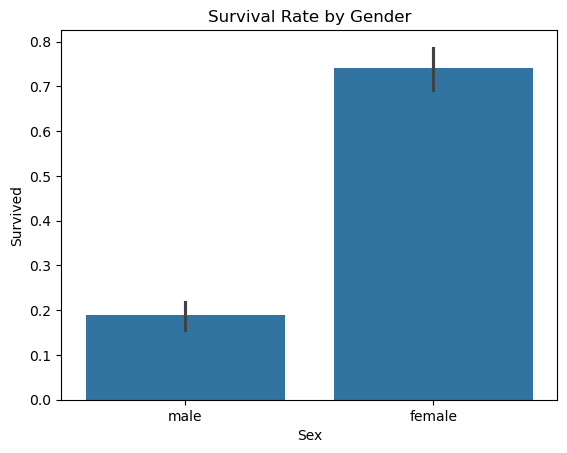

In [3]:
# Survival rate by gender (bar plot)
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

Shows women (74%) survived much more than men (19%).



In [7]:
survival_rate = df.groupby('Sex')['Survived'].mean() * 100
print(survival_rate)


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


## Part 4: Analyze Survival by Class

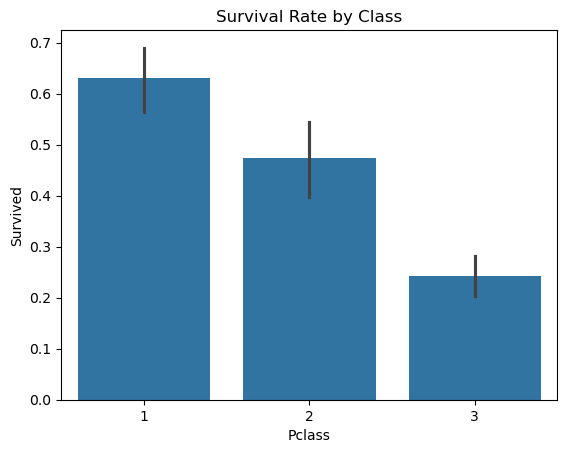

In [4]:
# Survival rate by passenger class (1st, 2nd, 3rd)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Class")
plt.show()

 Shows 1st class (63%) survived more than 3rd class (24%).

## Part 5: Analyze Survival by Age

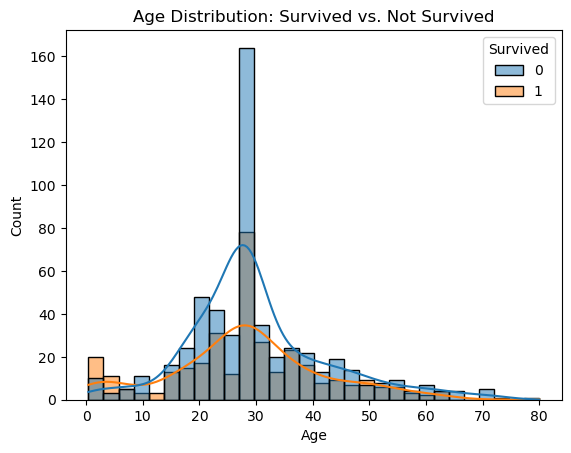

In [5]:
# Age distribution of survivors vs. non-survivors
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Age Distribution: Survived vs. Not Survived")
plt.show()

Shows children (<10 years) survived more often.

## Part 6: Correlation Heatmap

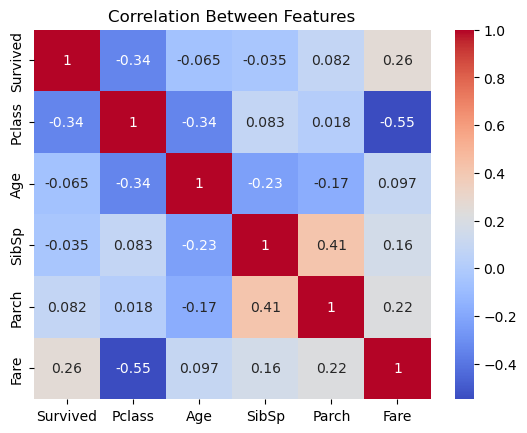

In [10]:
# Check how features relate to each other
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

##  Summarize Key Findings
## **🔍 Key Findings**  
1. **Women survived 3x more than men** (74% vs. 19%).  
2. **1st-class passengers survived 2.5x more than 3rd-class** (63% vs. 24%).  
3. **Children (<10 years) had higher survival rates**.  
4. **Ticket price (`Fare`) and class (`Pclass`) are strongly linked** (wealthier = better survival).  